In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [23]:
cars = pd.read_csv("C:\\Users\\hp\\Desktop\\Datasets\\ToyotaCorolla.csv")

In [24]:
cars.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [25]:
cars1=cars.drop(cars.columns.difference(["Price","Age_08_04","KM","HP","cc","Quarterly_Tax"]), axis=1)

In [26]:
cars1.head()

,Price,Age_08_04,KM,HP,cc,Quarterly_Tax
0,13500,23,46986,90,2000,210
1,13750,23,72937,90,2000,210
2,13950,24,41711,90,2000,210
3,14950,26,48000,90,2000,210
4,13750,30,38500,90,2000,210


In [27]:
cars1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Quarterly_Tax  1436 non-null   int64
dtypes: int64(6)
memory usage: 67.4 KB


In [28]:
cars1.corr()

,Price,Age_08_04,KM,HP,cc,Quarterly_Tax
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.219197
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.198431
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,0.278165
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,-0.298432
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.306996
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,1.000000


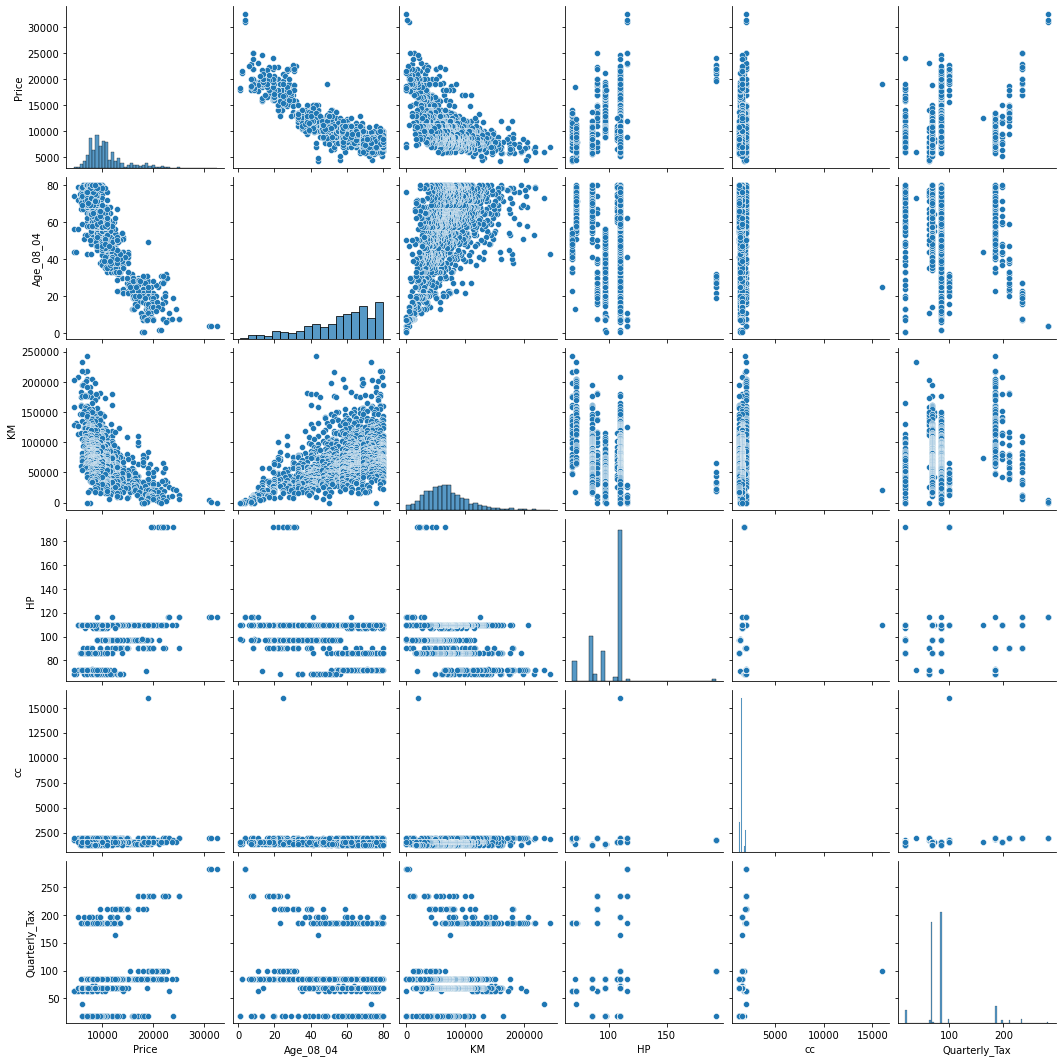

In [29]:
#scattering plot between variables along with histograms
sns.pairplot(cars1)

In [30]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+KM+HP+cc+Quarterly_Tax',data=cars1).fit()

In [31]:
model.params

Intercept        13394.539725
Age_08_04         -137.411010
KM                  -0.019663
HP                  46.696386
cc                   0.111669
Quarterly_Tax       16.709370
dtype: float64

In [32]:
print(model.tvalues, '\n', model.pvalues)

Intercept        34.610065
Age_08_04       -51.775530
KM              -14.449220
HP               16.371227
cc                1.151563
Quarterly_Tax    14.543424
dtype: float64 
 Intercept        3.503603e-191
Age_08_04         0.000000e+00
KM                2.835073e-44
HP                2.399825e-55
cc                2.496931e-01
Quarterly_Tax     8.571231e-45
dtype: float64


In [33]:
(model.rsquared,model.rsquared_adj,model.aic)

(0.8375491381023353, 0.8369811280957001, 25015.780602473886)

In [34]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

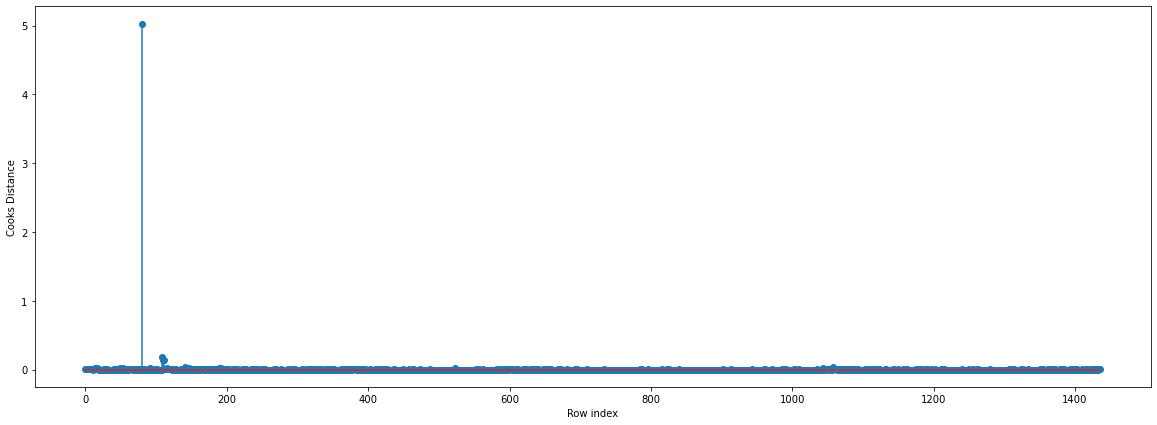

In [35]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars1)),np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [37]:
(np.argmax(c),np.max(c))

(80, 5.029209256920384)

In [38]:
car2 = cars1.drop(cars1.index[[80]],axis=0)

In [39]:
car3=car2.reset_index()

In [40]:
car4=car3.drop(['index'],axis=1)

In [41]:
import numpy as np
final_ml_V = smf.ols('Price~np.log(Age_08_04)+KM+HP+cc+Quarterly_Tax',data=car4).fit()

In [42]:
model_influence_V = final_ml_V.get_influence()
(c_V,_) = model_influence_V.cooks_distance

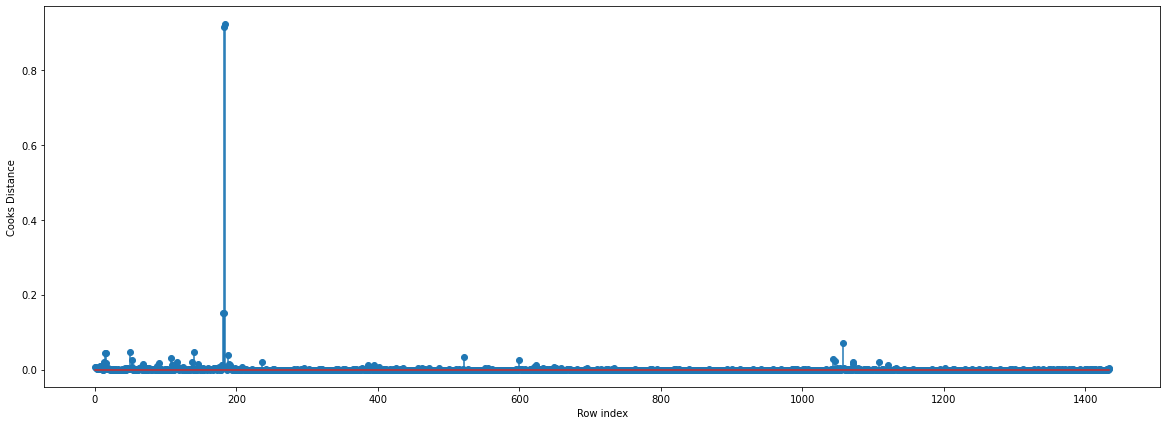

In [44]:
fig =plt. subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [45]:
(np.argmax(c_V),np.max(c_V))

(184, 0.9226134777529251)

In [46]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8464695301798103, 24913.17619439081)